In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage

In [88]:
np.random.seed(0)
T = 100
t_end = 0.8
dt = t_end / T
t = np.linspace(0, t_end, T)
x1 = 5.0*(np.sin(2*np.pi*t) + 1.5)
s = np.zeros((T,))
for i in range(T):
    s[i] = float(np.random.poisson(x1[i]*dt))
print(s)
ind = np.where(s==1.0)[0]
times = ind*dt

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


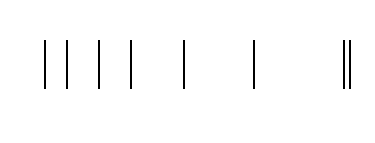

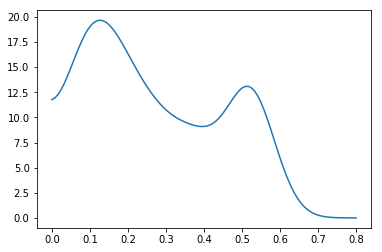

In [89]:
plt.figure(figsize=(6,2));
plt.eventplot(times, colors=['k'], orientation='horizontal', linewidths=2);
plt.axis('off');
plt.show();
x = scipy.ndimage.gaussian_filter(s, 8.0)
plt.plot(t, x/dt)

